(latent-change-notebook)=
# Latent Change Score Modeling

## LGM e SEM

I modelli del cambiamento del punteggio latente (*Latent Change Score Models*, LCSM; McArdle, 2001, 2009; McArdle & Hamagami, 2001) vengono utilizzati in varie discipline nelle scienze comportamentali per studiare come i costrutti cambiano nel tempo. Gli LCSM possono essere utilizzati per stimare la traiettoria di un costrutto (univariato) e consentono l’indagine di come i cambiamenti tra due costrutti (bivariati) siano associati tra loro nel tempo (ad esempio, la depressione per mariti e mogli; vedi McArdle, Hamagami, Kadlec e Fisher, 2007).

Da un punto di vista teorico, i modelli LCSM considerano il cambiamento dipendente dal tempo quale l’esito di interesse, piuttosto che i punteggi osservati. Questo semplice passaggio allo studio del cambiamento dipendente dal tempo rispetto agli stati dipendenti dal tempo consente di studiare direttamente il cambiamento all’interno della persona mediante una adeguata modellizzazione statistica. 

I modelli LCS vengono utilizzati in varie discipline nelle scienze comportamentali per studiare come i costrutti cambiano nel tempo. Questo quadro può essere esteso per esaminare specificamente come i cambiamenti in un costrutto siano associati a cambiamenti in un altro costrutto e può essere ampliato per stimare traiettorie non lineari più complesse rispetto ad altre tecniche statistiche. Tali domande di “cambiamento del cambiamento” possono essere di interesse in una serie di discipline di ricerca, poiché possono essere utilizzate per esaminare se i cambiamenti su una variabile predittiva sono correlati a cambiamenti su una variabile di esito in un momento successivo. Ad esempio, nella ricerca sulle terapie psicologiche, una domanda comune è se i cambiamenti in un dato processo terapeutico (ad esempio, valutazioni negative) siano correlati a cambiamenti successivi su una misura di risultato terapeutico (ad esempio, sintomi del disturbo da stress post-traumatico (PTSD)). La modellizzazione LCS può essere particolarmente adatta per studiare tali domande. 

La modellizzazione del punteggio di cambiamento latente si basa sui concetti della teoria classica dei test, che assume che il punteggio osservato (X) di un individuo (i) in un particolare momento (t) possa essere espresso come la somma del “punteggio vero” dell’individuo (lx) e del “punteggio unico / residuo” (u) dell’individuo in quel momento:

$$
X_{ti} = lx_{ti} + u_{ti}
$$

Suddividendo i punteggi osservati in questo modo, i modelli LCS sono in grado di testare ipotesi relative a costrutti non osservati (latenti) riducendo l’effetto dei residui di misura.

La specifica negli LCSM è tale che il modello può stimare una variabile latente che cattura il cambiamento nei “punteggi veri” latenti tra due punti temporali. Combinando due metodi di modellizzazione delle equazioni strutturali longitudinali, ovvero i “modelli di curva di crescita latente” e i “modelli cross-lag autoregressivi”, gli LCSM possono fornire un'analisi dettagliata dei cambiamenti intra-personali in uno (caso univariato) o più costrutti (caso bivariato) nel tempo. Un approccio comune alla modellizzazione è quello di comprendere prima le traiettorie individuali di ogni costrutto in un LCSM univariato, e poi di combinare entrambi i modelli per esaminare le loro relazioni in un LCSM bivariato. 

In questo tutorial utilizzeremo la descrizione dei modelli LCS fornita da {cite}`wiedemann2022lcsm`. Useremo inoltre le funzionalità del pacchetto R `lcsm` fornito dagli stessi autori.

## LCS univariato

Un LCSM univariato mira a descrivere i cambiamenti degli individui ($i$) in un costrutto ($X$) nel tempo ($t$). Esaminiamo qui sotto la figura fornita da {cite:t}`wiedemann2022lcsm`.

```{figure} images/lcsm_1.png
---
height: 450px
name: lcsm1-fig
---
**Diagramma di percorso semplificato di LCSM univariato.** Quadrati bianchi = punteggi osservati sulla variabile $x$ nei punti temporali da 1 a 5; cerchi verdi = punteggi veri latenti (prefisso ‘l’); cerchi blu = punteggi di cambiamento latenti (prefisso ‘d’); cerchio giallo = fattore di cambiamento latente costante. Frecce direzionali = regressioni; frecce bidirezionali = covarianze. Parametro `beta_x` = fattore di cambiamento proporzionale; parametro `phi_x` = autoregressione dei punteggi di cambiamento; parametro `sigma_g2lx1` = covarianza del fattore di cambiamento (`g2`) con il punteggio vero iniziale (`lx1`). I punteggi unici ($ux_t$) e le varianze uniche ($σ^2_{ux}$) non sono mostrati nella figura per semplicità.
```

Il quadro LCSM offre diverse opzioni per descrivere il cambiamento di un costrutto nel tempo: 

- un parametro di cambiamento costante ($α_x \cdot s_{xi}$), 
- un parametro di cambiamento proporzionale ($β_x \cdot x_{[t−1]i}$),
- un effetto autoregressivo dei punteggi di cambiamento ($ϕ_x \cdot ∆x_{[t−1]i}$). 
  
La scelta di quali componenti di cambiamento includere dipende dal quadro teorico e dall’adattamento del modello. L’Equazione seguente mostra come il cambiamento in un costrutto (X) in un punto temporale specifico (t) sia specificato quando si utilizzano questi tre parametri:

$$
∆x_{[t]i} = \alpha_x \cdot s_{xi} + \beta_x \cdot x_{[t−1]i} + ϕ_x \cdot ∆x_{[t−1]i}
$$

Il parametro di cambiamento costante ($α_x$) è simile al cambiamento in un modello lineare, perché ha lo stesso effetto su tutti i punteggi di cambiamento (si vedano i percorsi identici che conducono da `g2` a ciascun punteggio di cambiamento `dx2` a `dx5` nella figura precedente). Il parametro di cambiamento proporzionale ($β_x$) descrive se il “punteggio di cambiamento” al tempo ($t$) è determinato dal “punteggio vero” dello stesso costrutto al punto temporale precedente ($t-1$) -- si vedano i percorsi etichettati `beta_x` nella figura. Il cambiamento viene detto "proporzionale" perché i cambiamenti previsti sono proporzionali allo stato del punteggio vero nel momento temporale precedente. Le autoregressioni dei punteggi di cambiamento descrivono se un dato punteggio di cambiamento è determinato dal punteggio di cambiamento precedente (si vedano i percorsi etichettati `phi_x` nella figura). Si noti che in questo esempio tutti i parametri sono vincolati ad essere uguali nel tempo.

Questo modello viene chiamato modello di cambiamento duale ed è il modello LCS più comunemente usato. In questo modello c’è quello che viene spesso definito come un effetto maturativo ($g2_i$), così come l’effetto di cambiamento proporzionale ($\beta_x$). Il modello di cambiamento duale produce una traiettoria di crescita esponenziale che dipende dal segno e dalla grandezza di $g2_i$, $\beta_x$ e $lx1_i$ (si veda Grimm, An, McArdle, Zonderman e Resnick, 2012). 


## Illustrazione

Per illustrare l’adattamento e l’interpretazione dei modelli LCS, analizziamo i dati longitudinali di matematica che sono stati utilizzati nel Capitolo 3 di {cite:p}`grimm2016growth`. I dati longitudinali di matematica sono stati raccolti dall’NLSY-CYA (Center for Human Resource Research, 2009) e i punteggi di matematica provengono dal PIAT (Dunn & Markwardt, 1970). Il grado scolastico al momento del test viene utilizzato come metrica temporale e varia dalla seconda elementare (grado 2) alla terza media (grado 8). 

Leggiamo i pacchetti necessari.

In [1]:
source("_common.R")
library("lavaan")
library("semPlot")
library("knitr")
library("markdown")
library("patchwork")
library("psych")
library("DT")
library("kableExtra")
library("lme4")
library("lcsm")
library("tidyr")
library("stringr")

set.seed(12345)

This is lavaan 0.6-15
lavaan is FREE software! Please report any bugs.




Attaching package: ‘psych’




The following object is masked from ‘package:lavaan’:

    cor2cov




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha





Attaching package: ‘kableExtra’




The following object is masked from ‘package:dplyr’:

    group_rows




Loading required package: Matrix




Attaching package: ‘Matrix’




The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




This is lcsm 0.3.2



Please report any issues or ideas at:



https://github.com/milanwiedemann/lcsm/issues



Importiamo i dati in R.

In [2]:
#set filepath
filepath <- "https://raw.githubusercontent.com/LRI-2/Data/main/GrowthModeling/nlsy_math_wide_R.dat"
#read in the text data file using the url() function
nlsy_data <- read.table(file=url(filepath),na.strings = ".")

#adding names for the columns of the data set
names(nlsy_data) <- c('id', 'female', 'lb_wght', 'anti_k1', 'math2', 'math3', 'math4', 'math5', 'math6', 'math7', 'math8', 'age2', 'age3', 'age4', 'age5', 'age6', 'age7', 'age8', 'men2', 'men3', 'men4', 'men5', 'men6', 'men7', 'men8', 'spring2', 'spring3', 'spring4', 'spring5', 'spring6', 'spring7', 'spring8', 'anti2', 'anti3', 'anti4', 'anti5', 'anti6', 'anti7', 'anti8')

#reduce data down to the id variable and the math and reading variables of interest
nlsy_uni_data <- nlsy_data[ ,c('id', 'math2', 'math3', 'math4', 'math5', 'math6', 'math7', 'math8')]

Otteniamo le statistiche descrittive.

In [3]:
psych::describe(nlsy_uni_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,933,532334.89711,3.280208e+05,506602.0,520130.77108,391999.4400,201,1256601,1256400,0.28416593,-0.90788724,1.073892e+04
math2,2,335,32.60896,1.028600e+01,32.0,32.27509,10.3782,12,60,48,0.26866808,-0.46001296,5.619840e-01
math3,3,431,39.88399,1.029949e+01,41.0,39.88406,10.3782,13,67,54,-0.05209289,-0.32591683,4.961091e-01
math4,4,378,46.16931,1.016510e+01,46.0,46.22039,8.8956,18,70,52,-0.05957828,-0.07596653,5.228366e-01
math5,5,372,49.77419,9.471909e+00,48.0,49.76510,8.8956,23,71,48,0.04254744,-0.33811258,4.910956e-01
math6,6,390,52.72308,9.915594e+00,50.5,52.38462,9.6369,24,78,54,0.25104168,-0.38086152,5.020956e-01
math7,7,173,55.35260,1.062727e+01,53.0,55.08633,11.8608,31,81,50,0.21484791,-0.97096223,8.079765e-01
math8,8,142,57.83099,1.153101e+01,56.0,57.42982,12.6021,26,81,55,0.15905447,-0.52229674,9.676607e-01


Selezioneremo dal data set solo le variabili 'math2', 'math3', 'math4', 'math5', 'math6','math7' e 'math8'.

In [4]:
x_var_list <- paste0("math", 2:8)
x_var_list

[1] "math2" "math3" "math4" "math5" "math6" "math7" "math8"

Esaminiamo le traiettorie di crescita nel campione.

Warning message:
“Removed 2787 rows containing missing values (`geom_line()`).”


Warning message:
“Removed 4310 rows containing missing values (`geom_point()`).”


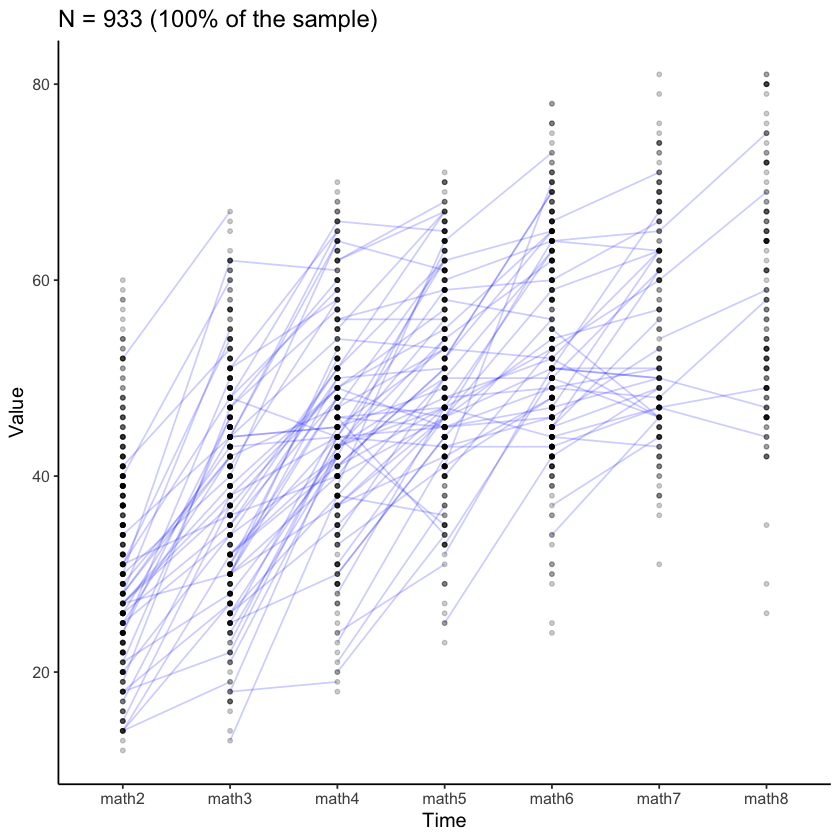

In [5]:
plot_trajectories(
    data = nlsy_uni_data,
    id_var = "id",
    var_list = x_var_list,
    xlab = "Time", ylab = "Value",
    connect_missing = FALSE,
    # random_sample_frac = 0.018,
    title_n = TRUE
)

Esaminiamo i dati di alcuni soggetti presi a caso.

Warning message:
“Removed 35 rows containing missing values (`geom_point()`).”


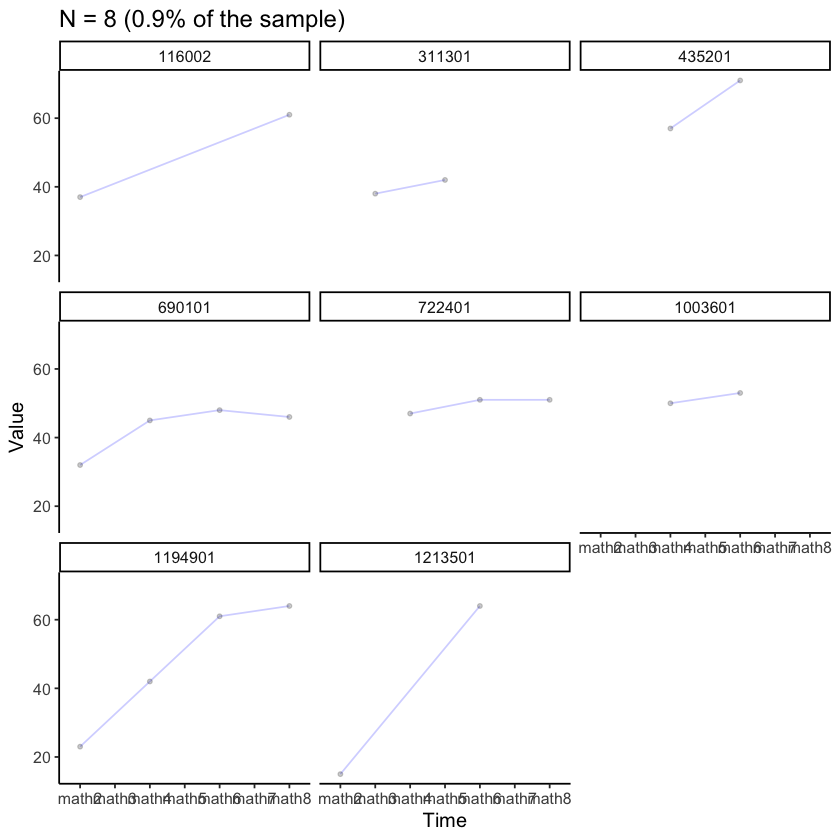

In [6]:
plot_trajectories(
    data = nlsy_uni_data,
    id_var = "id", 
    var_list = x_var_list,
    xlab = "Time", ylab = "Value",
    connect_missing = TRUE, 
    random_sample_frac = 0.009, 
    title_n = TRUE) +
  facet_wrap(~id)

In [7]:
uni_lavaan_results <- fit_uni_lcsm(
    data = nlsy_uni_data, 
    var = x_var_list,
    model = list(alpha_constant = TRUE, 
    beta = TRUE, 
    phi = TRUE)
)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


In [8]:
uni_lavaan_syntax <- fit_uni_lcsm(
    data = nlsy_uni_data,
    var = x_var_list,
    model = list(
        alpha_constant = TRUE,
        beta = TRUE,
        phi = TRUE
    ),
    return_lavaan_syntax = TRUE
)

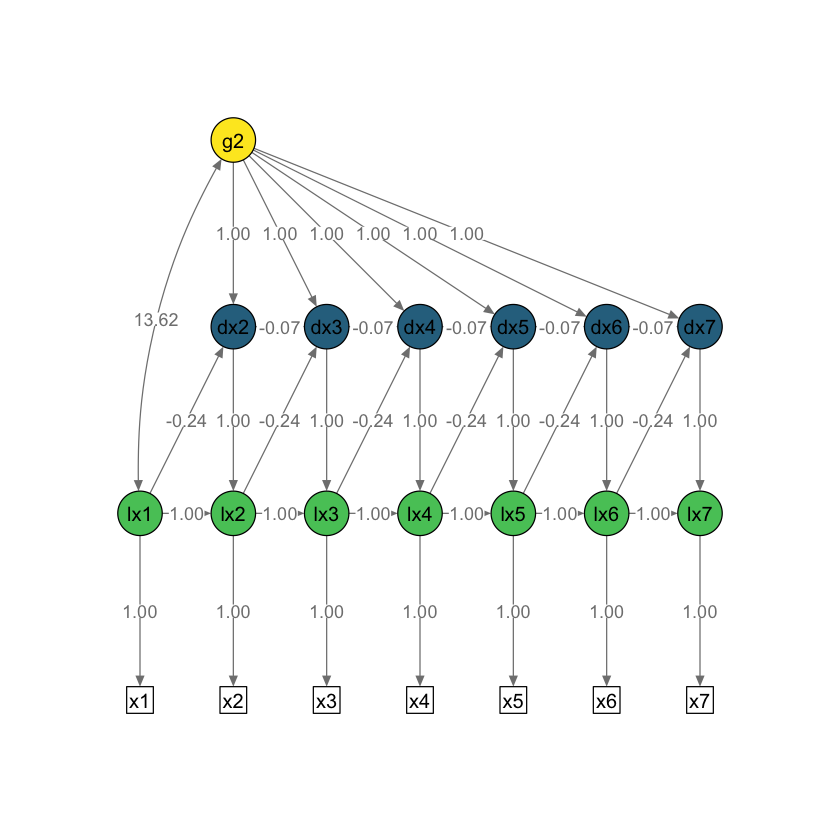

In [9]:
# Plot the results
plot_lcsm(
    lavaan_object = uni_lavaan_results,
    lavaan_syntax = uni_lavaan_syntax,
    edge.label.cex = .9,
    lcsm_colours = TRUE,
    lcsm = "univariate"
)

Esaminiamo la bontà di adattamento.

In [10]:
extract_fit(uni_lavaan_results)

model,chisq,npar,aic,bic,cfi,rmsea,srmr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,57.36404,8,15806.27,15844.96,0.9639096,0.03473681,0.1383128


Notiamo che le informazioni sull’adattamento del modello fornite da `lcsm` indicano che il modello di cambiamento duale si adatta bene ai dati con forti indici di adattamento globale (ad esempio, RMSEA inferiore a 0.05, CFI > 0.95).

In [11]:
extract_param(uni_lavaan_results)

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_lx1,32.37791274,0.46254741,69.999123,0.000000e+00,3.81550504,3.81550504,3.81550504
sigma2_lx1,72.01013637,6.18548167,11.641799,0.000000e+00,1.00000000,1.00000000,1.00000000
sigma2_ux,30.77766143,1.76240224,17.463472,0.000000e+00,30.77766143,0.29942914,0.29942914
alpha_g2,15.56495505,0.95461993,16.304871,0.000000e+00,6.44083179,6.44083179,6.44083179
sigma2_g2,5.83998629,0.94392300,6.186931,6.134688e-10,1.00000000,1.00000000,1.00000000
sigma_g2lx1,13.62144881,1.68304496,8.093336,6.661338e-16,0.66423319,0.66423319,0.66423319
beta_x,-0.24191830,0.01975698,-12.244703,0.000000e+00,-1.10303691,-1.10303691,-1.10303691
phi_x,-0.06519044,0.06120245,-1.065161,2.868032e-01,-0.09408467,-0.09408467,-0.09408467


L'output completo è fornito qui di seguito.

In [12]:
out = summary(uni_lavaan_results)
print(out)

lavaan 0.6.15 ended normally after 55 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        23
  Number of equality constraints                    15

                                                  Used       Total
  Number of observations                           932         933
  Number of missing patterns                        60            

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                57.364      59.371
  Degrees of freedom                                27          27
  P-value (Chi-square)                           0.001       0.000
  Scaling correction factor                                  0.966
    Yuan-Bentler correction (Mplus variant)                       

Parameter Estimates:

  Standard errors                             Sandwich
  Information bread     

I parametri stimati del modello di cambiamento duale includono la media del punteggio vero iniziale, `gamma_lx1`. Il valore 32.38 del punteggio vero iniziale rappresenta la media predetta dei punteggi di matematica al grado 2.  La media della componente di cambiamento costante è 15.56 ed è una delle componenti dei cambiamenti previsti nel tempo, con la seconda proveniente dall’effetto di cambiamento proporzionale. Poiché ci sono due aspetti del cambiamento nel modello di cambiamento duale, la media della componente di cambiamento costante può essere difficile da interpretare. Inoltre, la componente di cambiamento costante funziona come un’intercetta nell’equazione di cambiamento, il che rende il suo valore dipendente dalla scala della variabile osservata (cioè, aggiungendo o sottraendo una costante a tutti i punteggi altera la media della componente di cambiamento costante). E poiché la componente di cambiamento costante è un’intercetta nell’equazione di cambiamento, è interpretabile solo quando tutti gli altri predittori (punteggi veri precedenti) sono zero. Nei nostri dati, i punteggi di matematica non sono mai zero in questo set di dati, il che rende la media della componente di cambiamento costante un’estrapolazione dai dati e successivamente difficile da interpretare isolatamente.

A causa di queste limitazioni, descriviamo la forma complessiva dello sviluppo esaminando insieme la media della componente di cambiamento costante e il parametro di cambiamento proporzionale insieme alla media del punteggio vero iniziale. La traiettoria media inizia a 32.38 e aumenta in base a due aspetti: un effetto maturativo di 15.56 (media della componente di cambiamento costante), che viene aggiunto ad ogni grado, e l’effetto di cambiamento proporzionale, che funge da fattore limitante perché il parametro di cambiamento proporzionale è negativo (-0.24). Quindi, man mano che i punteggi aumentano nel tempo, aumentano a un ritmo più lento perché l’effetto di cambiamento proporzionale si rafforza nel tempo (perché i punteggi aumentano nel tempo). Per illustrare, abbiamo calcolato i cambiamenti medi previsti per i gradi successivi. Il cambiamento medio dalla seconda alla terza elementare è pari a 7.79 ($15.56 -0.24 \cdot 32.38$), il cambiamento medio dalla terza alla quarta elementare era 5.97 ($15.56 -0.24 \cdot 39.94$) e questo schema continua nel tempo. Quindi, la traiettoria media è una curva esponenziale crescente con un tasso di cambiamento decrescente. 

Poniamoci dunque il problema di creare una figura che riporta le traiettorie individuali previste dal modello duale. Per creare la figura dobbiamo innanzitutto recuperare la sintassi lavaan del modello duale.

In [13]:
cat(uni_lavaan_syntax)

# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
lx5 =~ 1 * x5 
lx6 =~ 1 * x6 
lx7 =~ 1 * x7 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
lx5 ~ 0 * 1 
lx6 ~ 0 * 1 
lx7 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
lx5 ~~ 0 * lx5 
lx6 ~~ 0 * lx6 
lx7 ~~ 0 * lx7 
# Specify intercept of obseved scores 
x1 ~ 0 * 1 
x2 ~ 0 * 1 
x3 ~ 0 * 1 
x4 ~ 0 * 1 
x5 ~ 0 * 1 
x6 ~ 0 * 1 
x7 ~ 0 * 1 
# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
x5 ~~ sigma2_ux * x5 
x6 ~~ sigma2_ux * x6 
x7 ~~ sigma2_ux * x7 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
lx5 ~ 1 * lx4 
lx6 ~ 1 * lx5 
lx7 ~ 1 * lx6 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
dx5 =~ 1 * lx5 
dx6 =~ 1 * lx6 


Creaimo un oggetto `mod` che contiene la specificazione del modello duale con la sintassi di lavaan.

In [14]:
mod = '

# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
lx5 =~ 1 * x5 
lx6 =~ 1 * x6 
lx7 =~ 1 * x7 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
lx5 ~ 0 * 1 
lx6 ~ 0 * 1 
lx7 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
lx5 ~~ 0 * lx5 
lx6 ~~ 0 * lx6 
lx7 ~~ 0 * lx7 
# Specify intercept of obseved scores 
x1 ~ 0 * 1 
x2 ~ 0 * 1 
x3 ~ 0 * 1 
x4 ~ 0 * 1 
x5 ~ 0 * 1 
x6 ~ 0 * 1 
x7 ~ 0 * 1 
# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
x5 ~~ sigma2_ux * x5 
x6 ~~ sigma2_ux * x6 
x7 ~~ sigma2_ux * x7 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
lx5 ~ 1 * lx4 
lx6 ~ 1 * lx5 
lx7 ~ 1 * lx6 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
dx5 =~ 1 * lx5 
dx6 =~ 1 * lx6 
dx7 =~ 1 * lx7 
# Specify latent change scores means 
dx2 ~ 0 * 1 
dx3 ~ 0 * 1 
dx4 ~ 0 * 1 
dx5 ~ 0 * 1 
dx6 ~ 0 * 1 
dx7 ~ 0 * 1 
# Specify latent change scores variances 
dx2 ~~ 0 * dx2 
dx3 ~~ 0 * dx3 
dx4 ~~ 0 * dx4 
dx5 ~~ 0 * dx5 
dx6 ~~ 0 * dx6 
dx7 ~~ 0 * dx7 
# Specify constant change factor 
g2 =~ 1 * dx2 + 1 * dx3 + 1 * dx4 + 1 * dx5 + 1 * dx6 + 1 * dx7 
# Specify constant change factor mean 
g2 ~ alpha_g2 * 1 
# Specify constant change factor variance 
g2 ~~ sigma2_g2 * g2 
# Specify constant change factor covariance with the initial true score 
g2 ~~ sigma_g2lx1 * lx1
# Specify proportional change component 
dx2 ~ beta_x * lx1 
dx3 ~ beta_x * lx2 
dx4 ~ beta_x * lx3 
dx5 ~ beta_x * lx4 
dx6 ~ beta_x * lx5 
dx7 ~ beta_x * lx6 
# Specify autoregression of change score 
dx3 ~ phi_x * dx2 
dx4 ~ phi_x * dx3 
dx5 ~ phi_x * dx4 
dx6 ~ phi_x * dx5 
dx7 ~ phi_x * dx6 

'

Dato che nella specificazione del modello le variabili osservate sono chiamate x1, ..., x8, dobbiamo trasformare il file dei dati in maniera corrispondente.

In [15]:
new_var_names <- c("id", paste0("x", 1:7))
new_var_names

[1] "id" "x1" "x2" "x3" "x4" "x5" "x6" "x7"

In [16]:
newdat <- nlsy_uni_data

names(newdat) <- new_var_names
head(newdat)

,id,x1,x2,x3,x4,x5,x6,x7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,201,NA,38,NA,55,NA,NA,NA
2,303,26,NA,NA,33,NA,NA,NA
3,2702,56,NA,58,NA,NA,NA,80
4,4303,NA,41,58,NA,NA,NA,NA
5,5002,NA,NA,46,NA,54,NA,66
6,5005,35,NA,50,NA,60,NA,59


Adattiamo ora il modello duale ai dati usando `sem`.

In [17]:
fit = sem(mod, newdat, missing="fiml")

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


L'output che abbiamo ottenuto è identico a quello trovato in precedenza.

In [18]:
out = summary(fit)
print(out)

lavaan 0.6.15 ended normally after 55 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        23
  Number of equality constraints                    15

                                                  Used       Total
  Number of observations                           932         933
  Number of missing patterns                        60            

Model Test User Model:
                                                      
  Test statistic                                57.364
  Degrees of freedom                                27
  P-value (Chi-square)                           0.001

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Observed
  Observed information based on                Hessian

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  lx1 =~              

Calcoliamo ora i punteggi fattoriali.

In [19]:
fs = lavPredict(fit)
head(fs)

lx1,lx2,lx3,lx4,lx5,lx6,lx7,dx2,dx3,dx4,dx5,dx6,dx7,g2
32.91853,41.15381,46.85997,51.35058,54.83407,57.54049,59.64284,8.235283,5.706156,4.490607,3.483489,2.706424,2.102348,16.19888
24.11723,30.82850,35.47868,39.13826,41.97710,44.18267,45.89596,6.711269,4.650180,3.659579,2.838838,2.205576,1.713289,12.54567
49.15305,57.02307,62.47613,66.76757,70.09655,72.68293,74.69203,7.870019,5.453067,4.291433,3.328984,2.586384,2.009101,19.76104
37.18693,45.42767,51.13761,55.63120,59.11699,61.82521,63.92895,8.240744,5.709939,4.493585,3.485799,2.708219,2.103742,17.23694
33.65976,42.09359,47.93732,52.53619,56.10366,58.87533,61.02836,8.433826,5.843724,4.598870,3.567472,2.771673,2.153033,16.57674
35.57593,43.49181,48.97665,53.29308,56.64146,59.24292,61.26373,7.915874,5.484840,4.316437,3.348381,2.601454,2.020807,16.52234


Consideriamo le stime dei punteggi veri nelle 7 rilevazioni temporali.

In [20]:
lx_fs = fs[, 1:7]
head(lx_fs)

lx1,lx2,lx3,lx4,lx5,lx6,lx7
32.91853,41.15381,46.85997,51.35058,54.83407,57.54049,59.64284
24.11723,30.82850,35.47868,39.13826,41.97710,44.18267,45.89596
49.15305,57.02307,62.47613,66.76757,70.09655,72.68293,74.69203
37.18693,45.42767,51.13761,55.63120,59.11699,61.82521,63.92895
33.65976,42.09359,47.93732,52.53619,56.10366,58.87533,61.02836
35.57593,43.49181,48.97665,53.29308,56.64146,59.24292,61.26373


In [21]:
dim(lx_fs)

[1] 933   7

In [22]:
dd <- as_tibble(lx_fs)
dim(dd)

[1] 933   7

Aggiungiamo la variabile `id`.

In [23]:
dd$id <- 1:933
head(dd)

lx1,lx2,lx3,lx4,lx5,lx6,lx7,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
32.91853,41.15381,46.85997,51.35058,54.83407,57.54049,59.64284,1
24.11723,30.82850,35.47868,39.13826,41.97710,44.18267,45.89596,2
49.15305,57.02307,62.47613,66.76757,70.09655,72.68293,74.69203,3
37.18693,45.42767,51.13761,55.63120,59.11699,61.82521,63.92895,4
33.65976,42.09359,47.93732,52.53619,56.10366,58.87533,61.02836,5
35.57593,43.49181,48.97665,53.29308,56.64146,59.24292,61.26373,6


Creiamo un vettore con i nuovi nomi delle variabili.

In [24]:
vlist = paste0("lx", 1:7)
vlist

[1] "lx1" "lx2" "lx3" "lx4" "lx5" "lx6" "lx7"

Le traiettorie di sviluppo individuale previste dal modello duale si possono ora visualizzare usando `plot_trajectories`.

Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


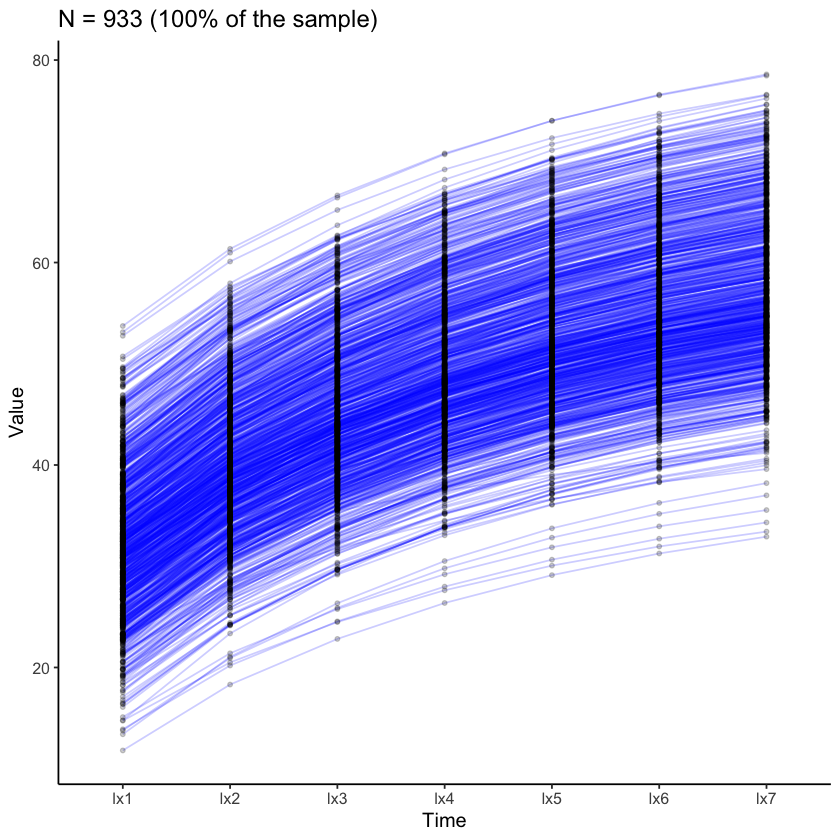

In [25]:
plot_trajectories(
    data = dd,
    id_var = "id",
    var_list = vlist,
    xlab = "Time", ylab = "Value",
    connect_missing = FALSE,
    # random_sample_frac = 0.018,
    title_n = TRUE
)

Come si vede dalla figura, tutte le traiettorie previste mostrano la forma generale di crescita che era stata descritta in precedenza.

La varianza del punteggio vero iniziale è 72.01 e descrive la variabilità inter-personale dei punteggi veri di matematica per il grado 2 (seconda elementare). 

La varianza della componente di cambiamento costante è 5.84 e rappresenta la variabilità tra i bambini in questo aspetto del cambiamento (di nuovo i parametri associati alla componente di cambiamento costante sono difficili da interpretare isolatamente). 

La covarianza tra il punteggio vero iniziale e la componente di cambiamento costante era 13.62, indicando che i bambini con punteggi veri di matematica più alti al  grado 2 tendevano ad avere punteggi nella componente di cambiamento costante più elevati, il che rivela un cambiamento complessivo maggiore dal secondo all’ottavo grado. 

Infine, la varianza dei punteggi unici era 30.78 e indica l’entità delle fluttuazioni intra-personali attorno alle traiettorie individuali predette dal modello.

In [26]:
y_var_list <- paste0("rec", 2:8)
y_var_list

[1] "rec2" "rec3" "rec4" "rec5" "rec6" "rec7" "rec8"

In [27]:
nlsy_multi_data <- read.table(file = "data/nlsy_math_hyp_wide_R.dat", na.strings = ".")
names(nlsy_multi_data) <- c(
    "id", "female", "lb_wght", "anti_k1",
    "math2", "math3", "math4", "math5", "math6", "math7", "math8",
    "comp2", "comp3", "comp4", "comp5", "comp6", "comp7", "comp8",
    "rec2", "rec3", "rec4", "rec5", "rec6", "rec7", "rec8",
    "bpi2", "bpi3", "bpi4", "bpi5", "bpi6", "bpi7", "bpi8",
    "asl2", "asl3", "asl4", "asl5", "asl6", "asl7", "asl8",
    "ax2", "ax3", "ax4", "ax5", "ax6", "ax7", "ax8",
    "hds2", "hds3", "hds4", "hds5", "hds6", "hds7", "hds8",
    "hyp2", "hyp3", "hyp4", "hyp5", "hyp6", "hyp7", "hyp8",
    "dpn2", "dpn3", "dpn4", "dpn5", "dpn6", "dpn7", "dpn8",
    "wdn2", "wdn3", "wdn4", "wdn5", "wdn6", "wdn7", "wdn8",
    "age2", "age3", "age4", "age5", "age6", "age7", "age8",
    "men2", "men3", "men4", "men5", "men6", "men7", "men8",
    "spring2", "spring3", "spring4", "spring5", "spring6", "spring7", "spring8",
    "anti2", "anti3", "anti4", "anti5", "anti6", "anti7", "anti8"
)

In [28]:
#reduce data down to the id variable and the math and reading variables of interest
nlsy_multi_data <- nlsy_multi_data[ , c('id', x_var_list, y_var_list)]

In [29]:
glimpse(nlsy_multi_data)

Rows: 933
Columns: 15
$ id    <int> 201, 303, 2702, 4303, 5002, 5005, 5701, 6102, 6801, 6802, 6803, …
$ math2 <int> NA, 26, 56, NA, NA, 35, NA, NA, NA, NA, NA, 35, NA, NA, NA, NA, …
$ math3 <int> 38, NA, NA, 41, NA, NA, 62, NA, 54, 55, 57, NA, 34, NA, 54, 66, …
$ math4 <int> NA, NA, 58, 58, 46, 50, 61, 55, NA, NA, NA, 59, 50, 48, NA, NA, …
$ math5 <int> 55, 33, NA, NA, NA, NA, NA, 67, 62, 66, 70, NA, NA, NA, NA, 65, …
$ math6 <int> NA, NA, NA, NA, 54, 60, NA, NA, NA, NA, NA, NA, NA, NA, 64, NA, …
$ math7 <int> NA, NA, NA, NA, NA, NA, NA, 81, 66, 68, NA, NA, NA, NA, 63, NA, …
$ math8 <int> NA, NA, 80, NA, 66, 59, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ rec2  <int> NA, 26, 33, NA, NA, 47, NA, NA, NA, NA, NA, 33, NA, NA, NA, NA, …
$ rec3  <int> 35, NA, NA, 34, NA, NA, 64, NA, 53, 66, 68, NA, 49, NA, 54, 55, …
$ rec4  <int> NA, NA, 50, 43, 46, 67, 70, 50, NA, NA, NA, 63, 53, 37, NA, NA, …
$ rec5  <int> 52, 35, NA, NA, NA, NA, NA, 69, 76, 66, 70, NA, NA, NA, NA, 78, …
$ rec6  <int> NA, 

In [30]:
model2 <- fit_bi_lcsm(
    data = nlsy_multi_data,
    var_x = x_var_list,
    var_y = y_var_list,
    model_x = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    model_y = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    coupling = list(xi_lag_yx = TRUE)
)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


In [31]:
extract_fit(model2, details = FALSE)

model,chisq,npar,aic,bic,cfi,rmsea,srmr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,181.0941,22,31419.96,31526.38,0.9678979,0.03049923,0.1195562


In [32]:
extract_param(model2, printp = TRUE) 

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
gamma_lx1,32.36386478,0.46713238,69.2819982,< .001,3.88552738,3.88552738,3.88552738
sigma2_lx1,69.37784563,6.84379619,10.1373337,< .001,1.00000000,1.00000000,1.00000000
sigma2_ux,31.97677136,2.45249031,13.0384904,< .001,31.97677136,0.31549398,0.31549398
alpha_g2,15.56839348,0.94994845,16.3886720,< .001,6.62793943,6.62793943,6.62793943
sigma2_g2,5.51735002,1.03144085,5.3491676,< .001,1.00000000,1.00000000,1.00000000
sigma_g2lx1,14.79980095,2.01210642,7.3553768,< .001,0.75644995,0.75644995,0.75644995
beta_x,-0.24515259,0.01951946,-12.5593918,< .001,-1.30977544,-1.30977544,-1.30977544
phi_x,-0.03232911,0.05604799,-0.5768113,.564,-0.04474505,-0.04474505,-0.04474505
gamma_ly1,33.79874985,0.44694125,75.6223547,< .001,3.69683796,3.69683796,3.69683796
